# Imports

In [1]:
%tensorflow_version 2.x

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras import Sequential
from tensorflow.keras.utils import get_file
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import shutil
import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

#dark mode
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

TensorFlow 2.x selected.


In [3]:
!pip install googleimagedownloader
from googleimagedownloader.googleimagedownloader import GoogleImageDownloader

# Testing an existing classifier

In [0]:
IMAGE_SIZE = (224, 224)

In [0]:
classifier_url ="https://tfhub.dev/google/imagenet/resnet_v2_50/classification/4" 

In [0]:
classifier = Sequential([
    #image_size?
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SIZE+(3,))
])

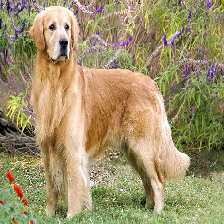

In [9]:
test_image = get_file('img.jpg','https://disenlis.com/wp-content/uploads/2019/01/Golden-Retriever-Standing1.jpg')
test_image = Image.open(test_image).resize(IMAGE_SIZE)
test_image

In [10]:
test_image = np.array(test_image)/255.0
test_image.shape

(224, 224, 3)

In [11]:
result = classifier.predict(test_image[np.newaxis, ...])
result.shape

(1, 1001)

In [12]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

208

In [13]:
labels_path = get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

16384/10484 [==============================================] - 0s 0us/step


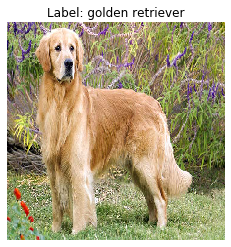

In [14]:
predicted_class_name = imagenet_labels[predicted_class]

plt.axis('off')
plt.title("Label: " + predicted_class_name, color = 'black')
plt.imshow(test_image)
plt.show()

# Transfer Learning

## Build the dataset

In [0]:
class_names = ['artoria_pendragon','nero_claudius']
path = 'dataset/'

train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')

train_ca_dir = os.path.join(train_dir, 'artoria_pendragon')  
train_im_dir = os.path.join(train_dir, 'nero_claudius')  
validation_ca_dir = os.path.join(validation_dir, 'artoria_pendragon') 
validation_im_dir = os.path.join(validation_dir, 'nero_claudius')  

if os.path.exists(path):
  shutil.rmtree(path)

os.makedirs(train_ca_dir)
os.makedirs(train_im_dir)
os.makedirs(validation_ca_dir)    
os.makedirs(validation_im_dir)

In [0]:
#what is it?
def manage_images(src, dest_train, dest_val, image_resize=IMAGE_SIZE, val_split=0.1, prefix=''):
  total = len(os.listdir(src))
  val = np.int(total*val_split)
  count = 0
  files = os.listdir(src)

  for file_name in files:
    try:
      dest = dest_train if count >= val else dest_val
      dest_file = os.path.join(dest, prefix + file_name) 

      img = Image.open(os.path.join(src,file_name))
      img.verify()
      # reopen because verify() was called
      # If you need to load the image after using this method, you must reopen the image file.
      # https://pillow.readthedocs.io/en/3.1.x/reference/Image.html
      img = Image.open(os.path.join(src,file_name))
      #resize
      img = img.resize(image_resize, Image.ANTIALIAS)
      #move
      img.save(dest_file)  
      count+=1 
    except Exception as e:
        print('Invalid image: ',file_name,e)
        if os.path.exists(dest_file):
          os.remove(dest_file)
  return


In [0]:
img_dir = os.path.realpath('Images/')

In [18]:
queries = ['artoria pendragon','fate', 'armor', 'typemoon','cosplay']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query='artoria pendragon '+query, numberImage=100)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_ca_dir, validation_ca_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=artoria pendragon artoria pendragon&source=lnms&tbm=isch
Error  HTTPSConnectionPool(host='www.moegallery.com', port=443): Max retries exceeded with url: /ebay/fate-stay-night-artoria-pendragon-body-pillow-case-811016.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:852)'),))
https://www.google.co.in/search?q=artoria pendragon fate&source=lnms&tbm=isch
Total Time : 0:00:07.426004
Invalid image:  89.jpg cannot write mode RGBA as JPEG
Invalid image:  49.jpg cannot write mode RGBA as JPEG
Invalid image:  92.jpg cannot write mode RGBA as JPEG
Invalid image:  14.jpg cannot write mode RGBA as JPEG
Invalid image:  33.jpg cannot write mode RGBA as JPEG
Invalid image:  68.jpg cannot write mode RGBA as JPEG
Invalid image:  82.jpg cannot identify image file '/content/Images/82.jpg'
Invalid image:  38.jpg cannot write mode RGBA as JPEG
Invalid image:  93.jpg cannot identify image file '/content/Images/93.jpg'
I

In [19]:
queries = ['nero claudius','fate','armor','typemoon','cosplay']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query='nero claudius '+query, numberImage=100)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_im_dir, validation_im_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=nero claudius nero claudius&source=lnms&tbm=isch
Error  HTTPSConnectionPool(host='www.eknightmedia.com', port=443): Max retries exceeded with url: /media/catalog/product/cache/1/image/9df78eab33525d08d6e5fb8d27136e95/4/5/4589977240306_5.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:852)'),))
Invalid image:  89.jpg cannot write mode RGBA as JPEG
Invalid image:  45.jpg cannot write mode RGBA as JPEG
Invalid image:  60.jpg cannot write mode P as JPEG
Invalid image:  49.jpg cannot write mode RGBA as JPEG
Invalid image:  92.jpg cannot write mode RGBA as JPEG
Invalid image:  56.jpg cannot identify image file '/content/Images/56.jpg'
Invalid image:  31.jpg cannot write mode P as JPEG
Invalid image:  20.jpg cannot write mode RGBA as JPEG
Invalid image:  24.jpg cannot identify image file '/content/Images/24.jpg'
Invalid image:  50.jpg cannot write mode RGBA as JPEG
Invalid image:  41.jpg cannot identify 

In [20]:
total_train = len(os.listdir(train_ca_dir))+ len(os.listdir(train_im_dir))
total_val = len(os.listdir(validation_ca_dir))+ len(os.listdir(validation_im_dir))

print('total training artoria pendragon images:', len(os.listdir(train_ca_dir)))
print('total training nero claudius images:', len(os.listdir(train_im_dir)))

print('total validation artoria pendragon images:', len(os.listdir(validation_ca_dir)))
print('total validation nero claudius images:', len(os.listdir(validation_im_dir)))
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training artoria pendragon images: 313
total training nero claudius images: 370
total validation artoria pendragon images: 40
total validation nero claudius images: 50
--
Total training images: 683
Total validation images: 90


## Using the dataset

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [22]:
train_data_gen = train_image_generator.flow_from_directory(train_dir,
                                                           shuffle=True,
                                                           batch_size=32,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')

Found 683 images belonging to 2 classes.


In [23]:
val_data_gen = validation_image_generator.flow_from_directory(validation_dir,
                                                              target_size=IMAGE_SIZE,
                                                              class_mode='binary')

Found 90 images belonging to 2 classes.


## Testing the classifier

In [0]:
image_batch, labels_batch = next(train_data_gen)

In [25]:
result_batch = classifier.predict(image_batch)
result_batch.shape

(32, 1001)

In [26]:
predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
predicted_class_names

array(['mask', 'vase', 'toyshop', 'hoopskirt', 'violin', 'academic gown',
       'altar', 'mask', 'neck brace', 'altar', 'comic book', 'altar',
       'toyshop', 'shield', 'breastplate', 'overskirt', 'maillot',
       'volcano', 'toyshop', 'cradle', 'breastplate', 'altar',
       'comic book', 'overskirt', 'overskirt', 'pencil box', 'bow',
       'hair slide', 'quill', 'tricycle', 'web site', 'vestment'],
      dtype='<U30')

In [0]:
def plot_images(img_batch, labels, predicted_labels):
  plt.figure(figsize=(12,12))
  plt.subplots_adjust(hspace=0.5)
  for i in range(15):
    plt.subplot(6,5,i+1) 
    plt.imshow(img_batch[i])
    color = "green" if predicted_labels[i] == class_names[np.int(labels[i])] else "red"
    plt.title(predicted_labels[i], color=color)
    plt.axis('off')

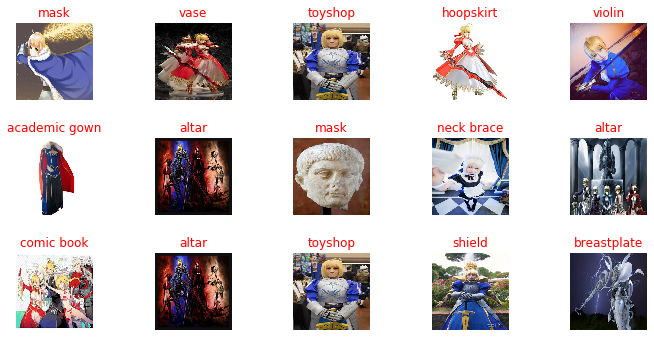

In [28]:
plot_images(image_batch, labels_batch, predicted_class_names)

## Downloading headless model

In [0]:
feature_extractor_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [0]:
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=IMAGE_SIZE+(3,))

In [31]:
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

(32, 2048)


In [0]:
feature_extractor_layer.trainable = False

## Adding a classification head

In [33]:
model = Sequential([
  feature_extractor_layer,
  Dense(1024, activation='relu'),
  Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 2048)              23564800  
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1025      
Total params: 25,664,001
Trainable params: 2,099,201
Non-trainable params: 23,564,800
_________________________________________________________________


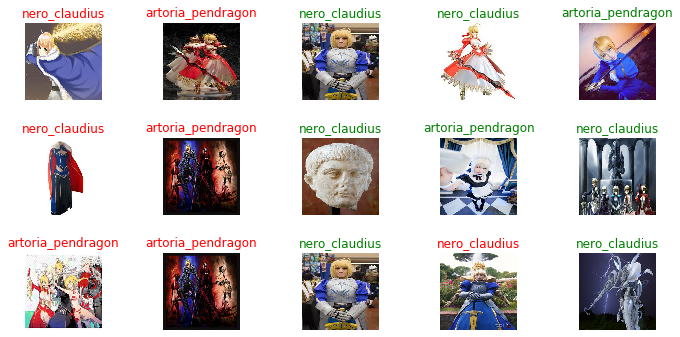

In [34]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)

## Train the model

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
history = model.fit(
    train_data_gen,
    epochs=5,
    steps_per_epoch=5,
    validation_data=val_data_gen
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 3 steps
Epoch 1/5
5/5 [==============================] - 28s 6s/step - loss: 1.3349 - accuracy: 0.5500 - val_loss: 1.6781 - val_accuracy: 0.6111
Epoch 2/5
5/5 [==============================] - 22s 4s/step - loss: 0.7862 - accuracy: 0.7194 - val_loss: 1.8764 - val_accuracy: 0.6222
Epoch 3/5
5/5 [==============================] - 22s 4s/step - loss: 0.4603 - accuracy: 0.8417 - val_loss: 1.4739 - val_accuracy: 0.6000
Epoch 4/5
5/5 [==============================] - 24s 5s/step - loss: 0.4199 - accuracy: 0.8687 - val_loss: 1.3629 - val_accuracy: 0.6444
Epoch 5/5
5/5 [==============================] - 24s 5s/step - loss: 0.4828 - accuracy: 0.8375 - val_loss: 1.0968 - val_accuracy: 0.5778


## Check results

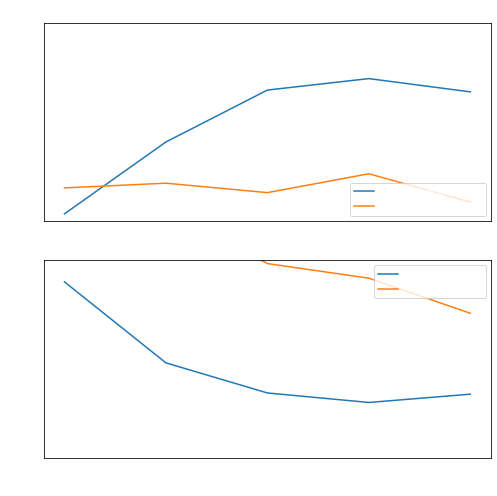

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

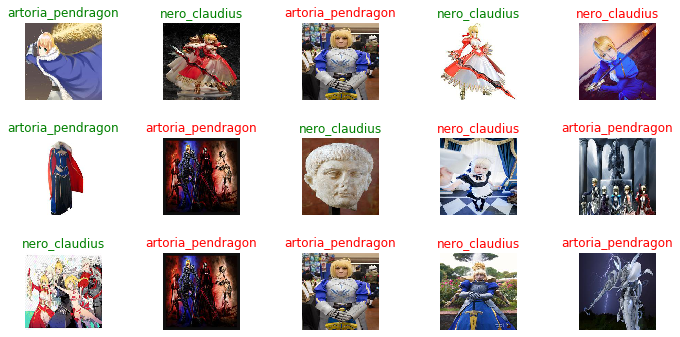

In [38]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()

plot_images(image_batch, labels_batch, predicted_class_names)

##Application base model

In [39]:
base_model = ResNet50V2(input_shape=IMAGE_SIZE+(3,),
                                               include_top=False,
                                               weights='imagenet')

94674944/94668760 [==============================] - 3s 0us/step


In [0]:
base_model.trainable = False

In [41]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [42]:
model = Sequential([
  base_model,
  GlobalAveragePooling2D(),
  Dense(1024, activation='relu'),
  Dense(1, activation='sigmoid')    
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 7, 7, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1025      
Total params: 25,664,001
Trainable params: 2,099,201
Non-trainable params: 23,564,800
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [44]:
history = model.fit(
    train_data_gen,
    epochs=5,
    steps_per_epoch=5,
    validation_data=val_data_gen
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 3 steps
Epoch 1/5
5/5 [==============================] - 33s 7s/step - loss: 1.7567 - accuracy: 0.5250 - val_loss: 2.1095 - val_accuracy: 0.5556
Epoch 2/5
5/5 [==============================] - 30s 6s/step - loss: 0.8534 - accuracy: 0.5688 - val_loss: 1.4967 - val_accuracy: 0.5000
Epoch 3/5
5/5 [==============================] - 27s 5s/step - loss: 0.6099 - accuracy: 0.6835 - val_loss: 0.7983 - val_accuracy: 0.5556
Epoch 4/5
5/5 [==============================] - 27s 5s/step - loss: 0.4101 - accuracy: 0.7842 - val_loss: 0.7793 - val_accuracy: 0.5778
Epoch 5/5
5/5 [==============================] - 30s 6s/step - loss: 0.3933 - accuracy: 0.8750 - val_loss: 0.8663 - val_accuracy: 0.6333


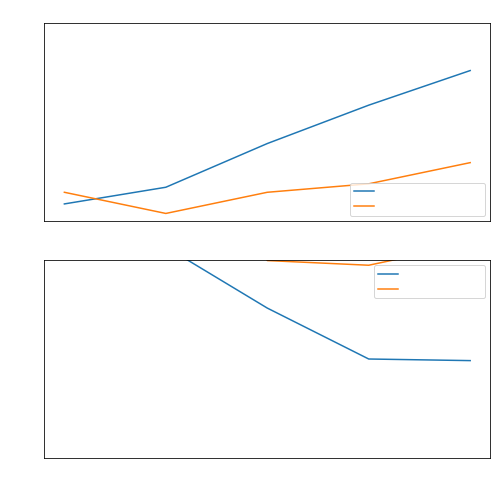

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,0.8])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

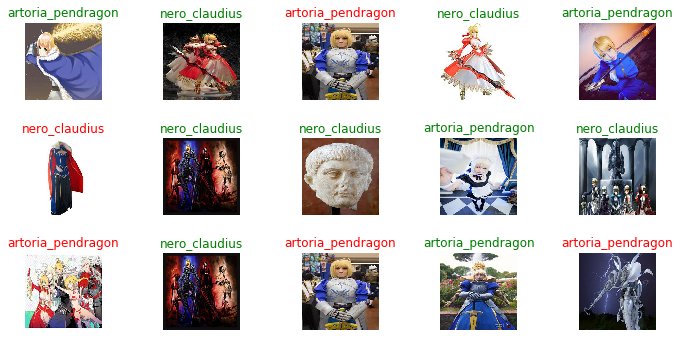

In [46]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)

## Fine tuning

In [0]:
base_model.trainable = True

In [48]:
print("Number of layers in the base model: ", len(base_model.layers))
fine_tune_at = 160
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False


Number of layers in the base model:  190


In [49]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 7, 7, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1025      
Total params: 25,664,001
Trainable params: 16,542,721
Non-trainable params: 9,121,280
_________________________________________________________________


In [50]:
initial_epochs = 5
fine_tune_epochs = 5
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_data_gen,
                         epochs=total_epochs,
                         steps_per_epoch=5,
                         initial_epoch =  history.epoch[-1],
                         validation_data=val_data_gen)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 3 steps
Epoch 5/10
5/5 [==============================] - 48s 10s/step - loss: 0.7467 - accuracy: 0.6687 - val_loss: 1.7493 - val_accuracy: 0.4667
Epoch 6/10
5/5 [==============================] - 44s 9s/step - loss: 0.5532 - accuracy: 0.7500 - val_loss: 3.4564 - val_accuracy: 0.6778
Epoch 7/10
5/5 [==============================] - 44s 9s/step - loss: 0.4415 - accuracy: 0.8438 - val_loss: 11.7487 - val_accuracy: 0.6333
Epoch 8/10
5/5 [==============================] - 44s 9s/step - loss: 0.3227 - accuracy: 0.9187 - val_loss: 18.0526 - val_accuracy: 0.6222
Epoch 9/10
5/5 [==============================] - 39s 8s/step - loss: 0.4421 - accuracy: 0.8345 - val_loss: 14.6166 - val_accuracy: 0.5222
Epoch 10/10
5/5 [==============================] - 46s 9s/step - loss: 0.3604 - accuracy: 0.8125 - val_loss: 26.4437 - val_accuracy: 0.5778


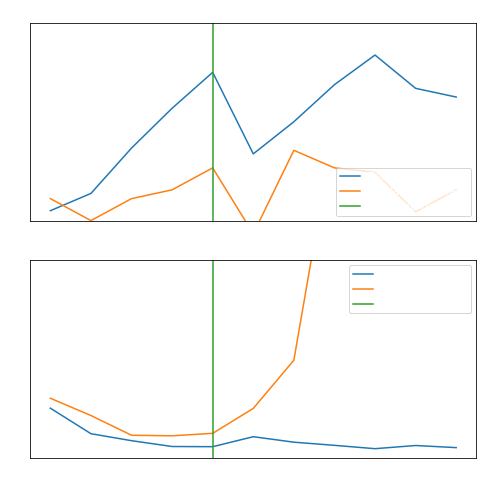

In [51]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.5, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 7.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

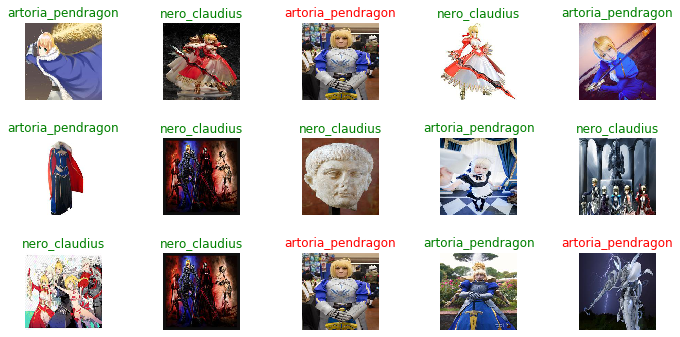

In [52]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)